In [148]:
! pip install colorspacious

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from scipy.stats import linregress
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
import scipy.stats as stats
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon
cmaps = OrderedDict()

In [3]:
states_list = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [4]:
renewable_data_path= "renewable_production_bill_btu.csv"
renewable_state_df = pd.read_csv(renewable_data_path)
renewable_state_df=renewable_state_df.rename(columns={"Unnamed: 0":"State"})
renewable_state_df.set_index("State")

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,
AL,234001,264530,242243,255849,242204,313665,270743,258941,230731,254958,276734
AK,12913,15685,16965,16078,17796,18629,19790,23807,25120,23608,24117
AZ,96752,80898,85935,113360,98806,98958,120149,129266,139231,148625,154992
AR,124882,125695,126235,124987,114237,121310,119813,117808,115408,115289,125039
CA,604499,647227,715878,838547,705086,744983,749645,738814,932768,1120569,1023623
CO,80070,80116,82190,104147,102686,116979,125648,123965,147499,150632,154200
CT,26358,29529,30357,30760,26910,30046,32677,33236,34222,33502,38245
DC,65,49,114,290,285,305,344,824,1107,1316,1603
DE,2952,3577,3838,4172,3581,3795,4224,3517,3102,3268,3384


In [5]:
renewable_nostate=renewable_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]

In [6]:
emissions_data_path= "EmissionsData.csv"
emissions_state_df = pd.read_csv(emissions_data_path)
emissions_state_df=emissions_state_df.rename(columns={"Unnamed: 0":"State"})
emissions_state_df.set_index("State")

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,
AL,139.666603,120.020443,132.722932,129.812612,123.039324,120.732885,123.080771,120.012608,114.872696,109.018634
AK,39.435905,37.788246,38.729384,38.585774,38.039447,35.975289,35.171091,36.067852,34.739390,34.295441
AZ,102.125070,93.252826,95.204594,93.282044,91.256850,95.060822,93.120620,90.856296,86.971877,86.137839
AR,64.059757,61.367031,65.723403,67.168798,65.940126,68.354108,68.985869,59.176044,62.319791,64.277677
CA,379.480916,366.184902,360.953079,346.864178,351.496006,354.219000,351.477053,359.290429,359.261859,360.913489
CO,97.064224,92.931686,95.398725,91.694520,90.609881,91.185686,91.833738,90.542532,87.183832,87.582932
CT,37.476760,35.720615,36.050835,34.650855,33.929278,34.664613,34.950955,36.290105,34.086323,33.578603
DC,3.078350,3.171786,3.209717,3.080198,2.648655,2.826738,3.019301,2.984181,2.768008,2.634548
DE,15.588371,11.939328,11.232065,12.191584,13.316142,13.046189,12.685983,12.786006,13.240562,12.339543


In [7]:
emissions_nostate=emissions_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]

In [8]:
averages = emissions_nostate.mean(axis=1)

In [9]:
x_values = list(renewable_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values)
y_values = list(emissions_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values)

In [10]:
x_values = np.concatenate(x_values, axis =0)
y_values = np.concatenate(y_values, axis =0)

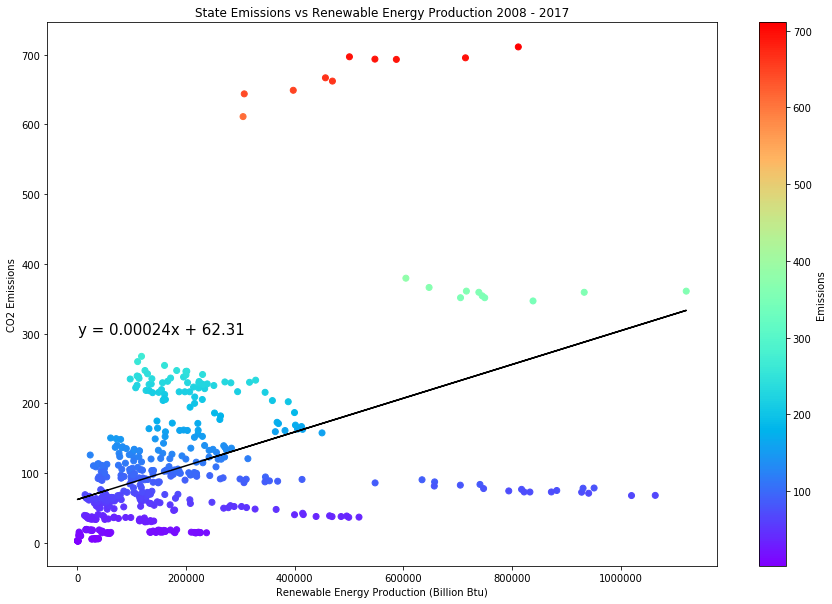

pvalue = 1.1914239247848523e-24
0.18697207374556615


In [11]:
plt.figure(figsize=(15,10))
plt.scatter(x_values, y_values, c=y_values, cmap='rainbow')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
clb = plt.colorbar()
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept, 2))
plt.title("State Emissions vs Renewable Energy Production 2008 - 2017")
plt.plot(x_values, regress_values, "black")
plt.annotate(line_eq, (300,300), fontsize = 15, color="black")
plt.xlabel('Renewable Energy Production (Billion Btu)')
plt.ylabel('CO2 Emissions')
clb.set_label('Emissions')
plt.savefig('overall_production.png')
plt.show()
print(f'pvalue = {pvalue}')
print(rvalue**2)

In [12]:
consumption_data_path= "../State Solar Production Data by Year/RenewableConsumption.csv"
consumption_state_df = pd.read_csv(consumption_data_path)
consumption_state_df=consumption_state_df.rename(columns={"Unnamed: 0":"State"})
consumption_state_df.set_index("State")

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,
AL,237856,274392,266140,279972,265964,336862,293899,284415,259532,281538,298413
AK,13126,15912,17148,16702,17831,18931,22762,23828,26226,24438,24960
AZ,111992,96274,101344,129780,114962,119660,139783,149186,162312,171736,178463
AR,126307,130887,138625,135135,125379,132369,131627,129281,127818,120247,123771
CA,680732,726123,837498,947812,811515,859435,865005,863477,1060607,1251196,1154499
CO,77362,78330,81844,107003,107298,121965,130630,132628,157964,160765,164632
CT,36462,41681,43544,43378,38997,42943,45474,46769,47844,47376,50352
DC,565,620,1123,1310,1094,1175,1313,1831,2193,2257,2664
DE,5789,6640,7755,7862,7140,7610,8064,7745,7594,7912,8047


In [13]:
consumption_nostate=consumption_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]

In [14]:
# indices
# positive OH[35] PA[38] IN[14] GA[10] Il[13]
# negative TX[43] WA[47] MS[24] ND[34] ID[12]
# no change VT [45]

In [15]:
x_values2 = list(consumption_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values)

In [16]:
x_values2 = np.concatenate(x_values2, axis =0)

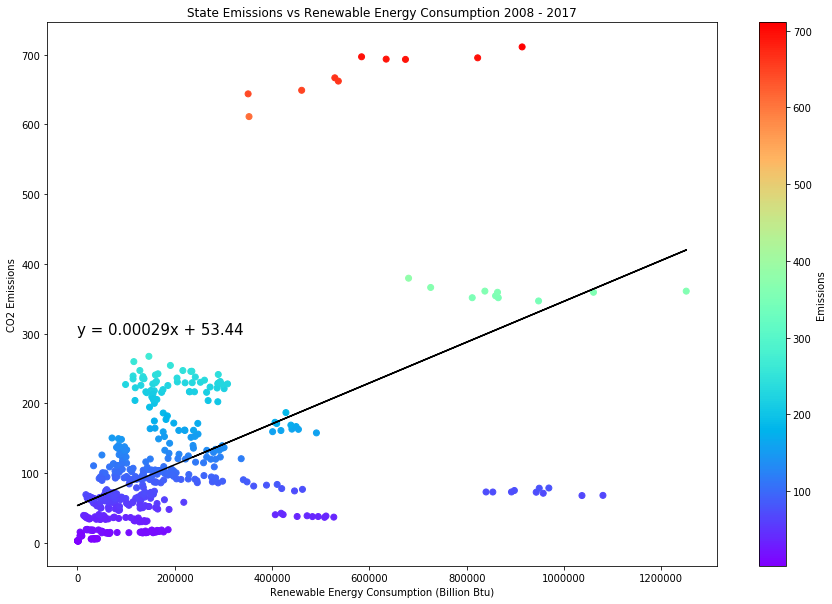

0.2718592537766137
pvalue = 6.79306335646375e-37


In [17]:
plt.figure(figsize=(15,10))
plt.scatter(x_values2, y_values, c=y_values, cmap='rainbow')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values)
regress_values = x_values2 * slope + intercept
clb = plt.colorbar()
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept, 2))
plt.title("State Emissions vs Renewable Energy Consumption 2008 - 2017")
plt.plot(x_values2, regress_values, "black")
plt.annotate(line_eq, (300,300), fontsize = 15, color="black")
plt.xlabel('Renewable Energy Consumption (Billion Btu)')
plt.ylabel('CO2 Emissions')
clb.set_label('Emissions')
plt.savefig('overall_consumption.png')
plt.show()
print(rvalue**2)
print(f'pvalue = {pvalue}')

In [18]:
years=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

In [19]:
texas = emissions_state_df.iloc[[43]]
texas = texas[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values
texas_production = renewable_state_df.iloc[[43]]
texas_production = texas_production[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values

In [20]:
ohio = emissions_state_df.iloc[[35]]
ohio = ohio[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values
ohio_production = renewable_state_df.iloc[[35]]
ohio_production = ohio_production[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values

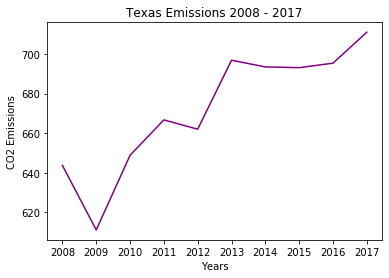

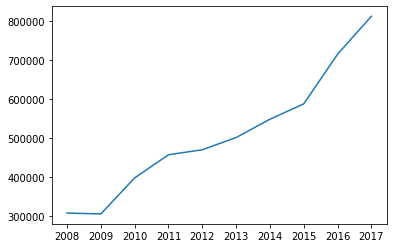

In [21]:
plt.plot(years,texas[0], color = "purple")
plt.title("Texas Emissions 2008 - 2017")
plt.xlabel("Years")
plt.ylabel("CO2 Emissions")
plt.savefig("texas_emits")
plt.show()
plt.plot(years, texas_production[0])
plt.show()

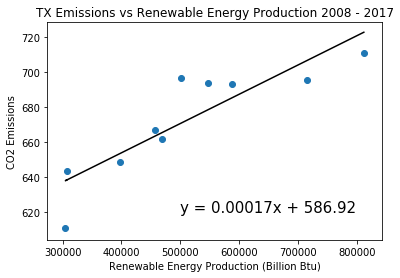

0.7691363223495367


In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(texas_production[0], texas[0])
regress_values = texas_production[0] * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept, 2))
plt.title("TX Emissions vs Renewable Energy Production 2008 - 2017")
plt.plot(texas_production[0], regress_values, "black")
plt.annotate(line_eq, (500000,620), fontsize = 15, color="black")
plt.xlabel('Renewable Energy Production (Billion Btu)')
plt.ylabel('CO2 Emissions')
plt.scatter(texas_production[0],texas[0])
plt.show()
print(rvalue**2)

In [28]:

mean_production = [(renewable_nostate.iloc[43].mean()),(renewable_nostate.iloc[47].mean()),(renewable_nostate.iloc[35].mean()),(renewable_nostate.iloc[38].mean()), (renewable_nostate.iloc[45].mean())]
mean_consumption = [(consumption_nostate.iloc[43].mean()),(consumption_nostate.iloc[47].mean()),(consumption_nostate.iloc[35].mean()),(consumption_nostate.iloc[38].mean()), (consumption_nostate.iloc[45].mean())]
mean_emissions = [(emissions_nostate.iloc[43].mean()),(emissions_nostate.iloc[47].mean()),(emissions_nostate.iloc[35].mean()),(emissions_nostate.iloc[38].mean()), (emissions_nostate.iloc[45].mean())]

In [29]:
mean_consumption
x_list = ["TX", "WA", "OH", "PA", "VT"]
tick_val = np.arange(len(x_list))

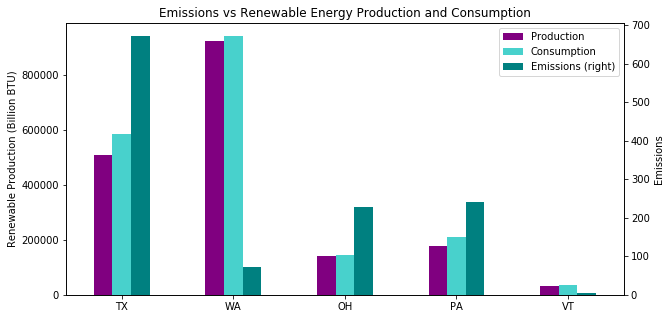

In [42]:
total_renew_df = pd.DataFrame ({
    "Production": mean_production,
    "Consumption": mean_consumption,
    "Emissions": mean_emissions
})

ax = total_renew_df.plot.bar(rot=0, secondary_y="Emissions", color=('purple','mediumturquoise', "teal"), figsize = (10,5))
ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
ax1.set_ylabel('Renewable Production (Billion BTU)')
ax2.set_ylabel('Emissions')
ax.set_title("Emissions vs Renewable Energy Production and Consumption")
# ax.set_xticks()
# total_renew_df.plot.bar(rot=0,color=['palegreen','mediumturquoise', 'purple'])
# plt.title("Emissions vs Renewable Energy Production and Consumption")
plt.xticks(ticks=tick_val, labels=x_list)
plt.xlabel("States of Interest")
# plt.ylabel("Energy in K, Billion Btu and CO2 in mmt")
plt.savefig("bar_chart.png")
plt.show()

In [25]:
stats.ttest_ind(x_values, y_values, equal_var=False)

Ttest_indResult(statistic=20.766905565987656, pvalue=7.658947771874713e-70)

In [26]:
avgvalues = list(averages.values)
averages.max()

672.2128306999999

In [27]:
zipped = zip(states_list,avgvalues)
emissions_dict = dict(zipped)

In [28]:
from __future__ import (absolute_import, division, print_function)
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import rgb2hex, Normalize

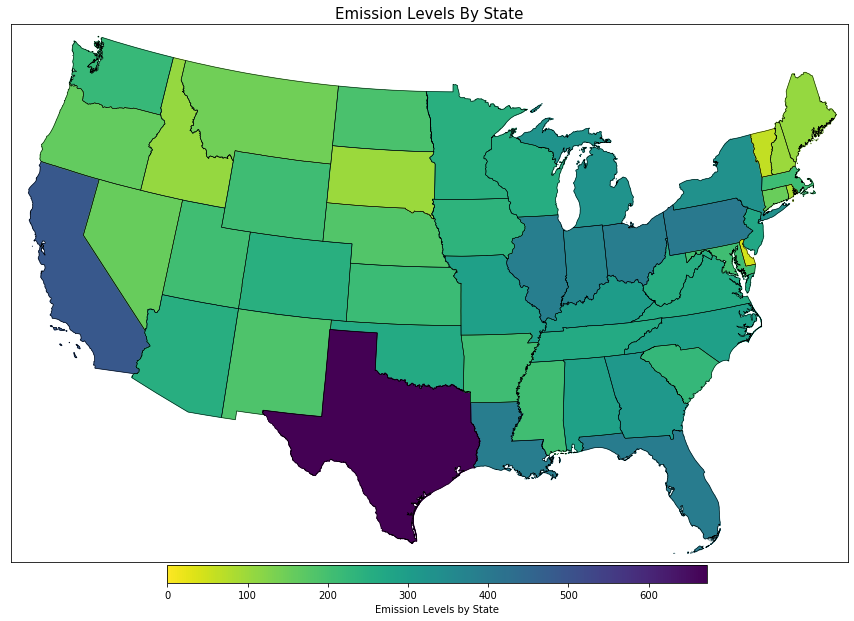

In [29]:
plt.figure(figsize=(15,10))
fig = plt.gcf()
# clb = plt.colorbar() <this doesnt work with basemaps 
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
#https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
shp_info = m.readshapefile('shapefile/cb_2018_us_state_500k', 'states', drawbounds=True)

# choose a color for each state based on emissions levels.
colors={}
statenames=[]
cmap = plt.cm.viridis
vmin = 0; vmax = 673 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skipping these
    if statename not in ['District of Columbia','Puerto Rico', 'American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands']:
        emm = emissions_dict[statename]
        colors[statename] = cmap(1.-np.sqrt((emm-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skipping these
    if statenames[nshape] not in ['District of Columbia','Puerto Rico','American Samoa','United States Virgin Islands', 'Guam','Commonwealth of the Northern Mariana Islands']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Emission Levels By State', fontsize=15)
norm = Normalize(vmin=vmin, vmax=vmax)
cax = fig.add_axes([0.27, 0.1, 0.5, 0.025]) # posititon
cb = ColorbarBase(cax,cmap=cmap.reversed(),norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Emission Levels by State')
# plt.savefig('Emissions_map.png')
plt.show()



In [28]:
pctconsumption_data_path= "percentconsumption.csv"
pctconsumption_state_df = pd.read_csv(pctconsumption_data_path)
# pctconsumption_state_df=pctconsumption_state_df.rename(columns={"Unnamed: 0":"State"})
pctconsumption_state_df = pctconsumption_state_df.set_index("State")

In [29]:
pctconsumption_state_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,
AL,11.875106,15.243187,13.704076,14.606478,14.070018,17.421259,14.915808,14.782907,13.451652,14.808748
AK,2.017832,2.487972,2.615719,2.546735,2.738272,3.061847,3.760717,3.819949,4.316540,4.008326
AZ,7.641605,6.976134,7.323618,9.112337,8.244987,8.477716,9.842071,10.343797,11.014718,11.649990
AR,11.376857,12.565751,12.300846,11.967746,11.686906,11.984160,11.732131,12.169926,12.120471,11.366801
CA,8.429909,9.339480,10.791461,12.200220,10.752766,11.234396,11.404302,11.255268,13.553179,15.859569
CO,5.200950,5.345068,5.400316,7.265667,7.442841,8.306935,8.809566,8.897941,10.869429,10.985193
CT,4.707228,5.438125,5.674861,5.853989,5.372464,5.733363,6.045137,6.181895,6.604383,6.522511
DC,0.306892,0.332466,0.589891,0.713344,0.633182,0.672204,0.732382,1.027405,1.258732,1.352558
DE,1.985901,2.559181,3.097812,2.882451,2.609029,2.774800,2.939450,2.787405,2.773800,2.924921


In [30]:
x_values3 = list(pctconsumption_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values)

In [31]:
x_values3 = np.concatenate(x_values3, axis =0)

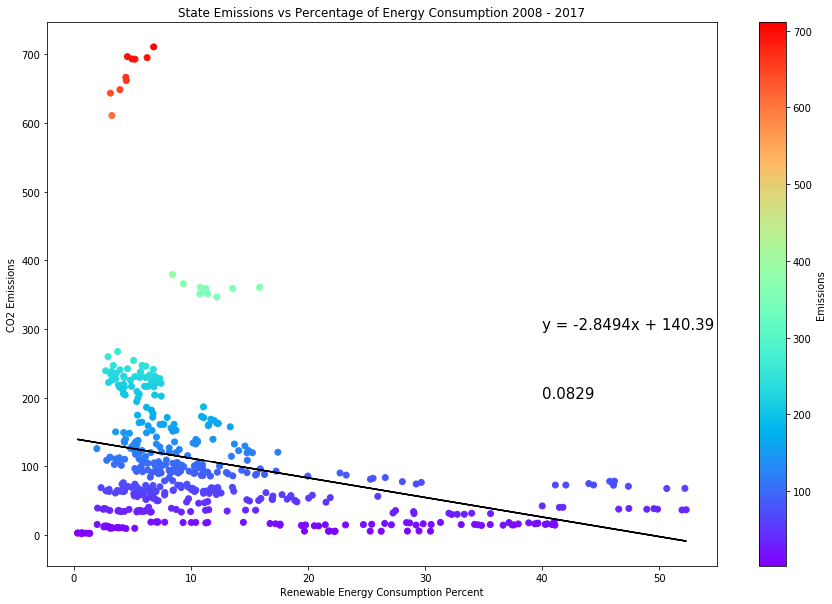

0.08288144223079968
pvalue = 3.440938786541394e-11


In [49]:
plt.figure(figsize=(15,10))
plt.scatter(x_values3, y_values, c=y_values, cmap='rainbow')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values)
regress_values = x_values3 * slope + intercept
clb = plt.colorbar()
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept, 2))
plt.title("State Emissions vs Percentage of Energy Consumption 2008 - 2017")
plt.plot(x_values3, regress_values, "black")
plt.annotate(line_eq, (40,300), fontsize = 15, color="black")
plt.annotate(round(rvalue**2,4), (40,200), fontsize = 15, color="black")
plt.xlabel('Renewable Energy Consumption Percent')
plt.ylabel('CO2 Emissions')
clb.set_label('Emissions')
plt.savefig('percent_consumption.png')
plt.show()
print(rvalue**2)
print(f'pvalue = {pvalue}')

In [33]:
pctaverages = pctconsumption_state_df.mean(axis=1)
pctaverages = list(pctaverages.values)

In [34]:
pctconsumption_state_df.max()

2008    43.983177
2009    42.020176
2010    41.464404
2011    52.300991
2012    51.940346
2013    47.404261
2014    49.850952
2015    46.535255
2016    48.933479
2017    49.546519
dtype: float64

In [35]:
zipped2 = zip(states_list, pctaverages)
percent_dict = dict(zipped2)

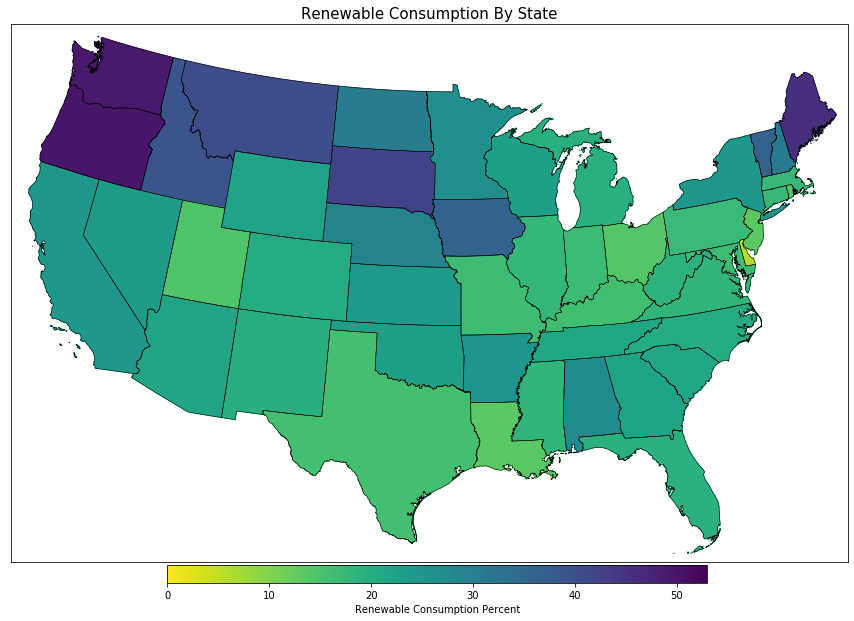

In [38]:
plt.figure(figsize=(15,10))
fig = plt.gcf()
# clb = plt.colorbar() <this doesnt work with basemaps 
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
#https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
shp_info = m.readshapefile('shapefile/cb_2018_us_state_500k', 'states', drawbounds=True)
# choose a color for each state based on emissions levels.
colors={}
statenames=[]
cmap = plt.cm.viridis
vmin = 0; vmax = 53 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skipping these
    if statename not in ['District of Columbia','Puerto Rico', 'American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands']:
        pct = percent_dict[statename]
        colors[statename] = cmap(1.-np.sqrt((pct-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skipping these
    if statenames[nshape] not in ['District of Columbia','Puerto Rico','American Samoa','United States Virgin Islands', 'Guam','Commonwealth of the Northern Mariana Islands']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

plt.title('Renewable Consumption By State', fontsize=15)
norm = Normalize(vmin=vmin, vmax=vmax)
cax = fig.add_axes([0.27, 0.1, 0.5, 0.025]) # posititon
cb = ColorbarBase(cax,cmap=cmap.reversed(),norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Renewable Consumption Percent')
plt.savefig('percent_map.png')
plt.show()

In [39]:
x_values4 = list(pctconsumption_state_df[['2015','2016','2017']].values)
y_values4 = list(emissions_state_df[['2015','2016','2017']].values)

In [40]:
x_values4 = np.concatenate(x_values4, axis =0)
y_values4 = np.concatenate(y_values4, axis =0)

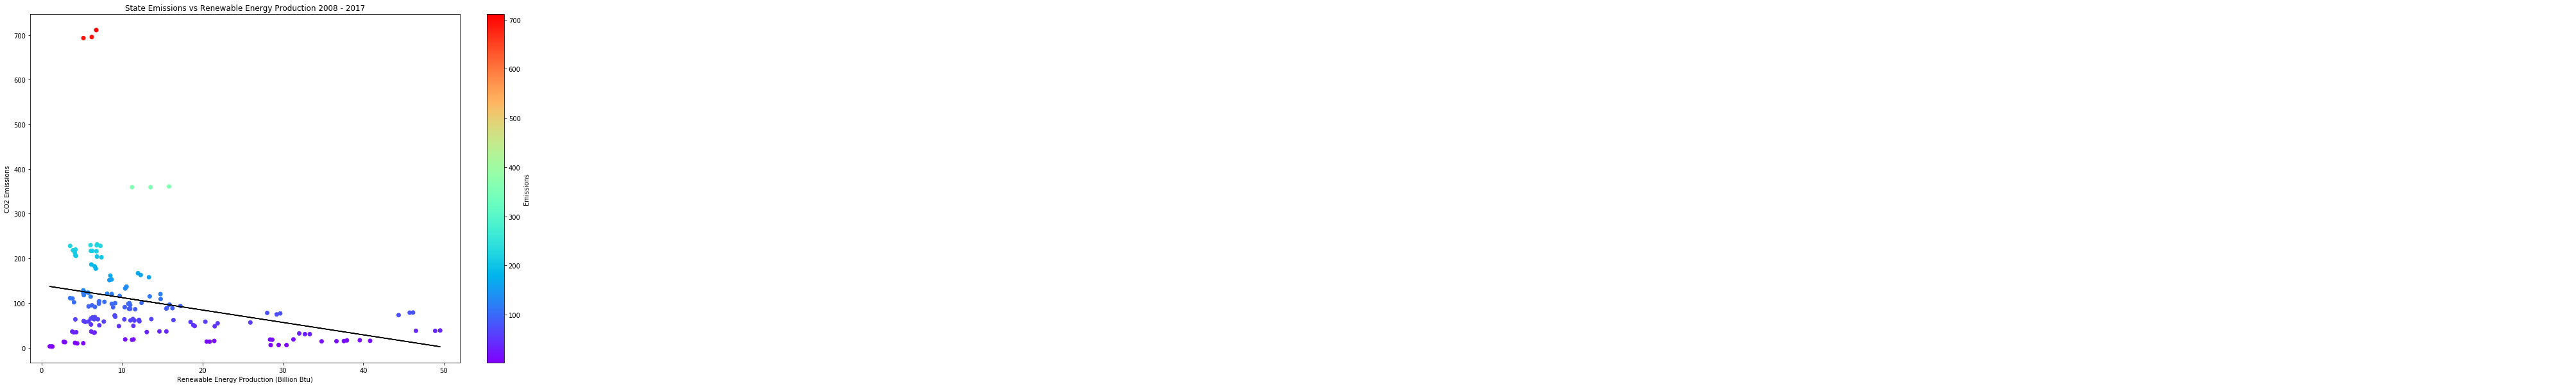

pvalue = 0.0004347322298171935
0.07894421237215757


In [41]:
plt.figure(figsize=(15,10))
plt.scatter(x_values4, y_values4, c=y_values4, cmap='rainbow')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)
regress_values = x_values4 * slope + intercept
clb = plt.colorbar()
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept, 2))
plt.title("State Emissions vs Renewable Energy Production 2008 - 2017")
plt.plot(x_values4, regress_values, "black")
plt.annotate(line_eq, (300,300), fontsize = 15, color="black")
plt.xlabel('Renewable Energy Production (Billion Btu)')
plt.ylabel('CO2 Emissions')
clb.set_label('Emissions')
plt.savefig('overall_production.png')
plt.show()
print(f'pvalue = {pvalue}')
print(rvalue**2)